# How does merge, fillna work - change values

In [109]:

# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K1', 'K1', 'K1', 'K1'],
         'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32],} 
   
# Define a dictionary containing employee data 
data0 = {'key': ['K0', 'K1', 'K2', 'K1'],
         'key1': ['K0', 'K0', 'K0', 'K0'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df0 = pd.DataFrame(data0) 

res = pd.merge(df0, df1, how='outer', on=['key'])
 
res

,key,key1_x,Address,Qualification,key1_y,Name,Age
0,K0,K0,Nagpur,Btech,K1,Jai,27
1,K1,K0,Kanpur,B.A,K1,Princi,24
2,K1,K0,Kannuaj,B.hons,K1,Princi,24
3,K2,K0,Allahabad,Bcom,K1,Gaurav,22
4,K3,NaN,NaN,NaN,K1,Anuj,32


In [110]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
values = {"A": "How", "B": 1}
df.fillna(value = values, inplace = True)
df

,A,B,C,D
0,How,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,How,1.0,NaN,NaN
3,How,3.0,NaN,4.0


# Merge all df to one df

In [1]:
from main import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

['df_olist_geolocation_dataset.csv', 'df_olist_orders_dataset.csv', 'df_product_category_name_translation.csv', 'df_olist_customers_dataset.csv', 'df_olist_products_dataset.csv', 'df_olist_order_reviews_dataset.csv', 'df_olist_order_payments_dataset.csv', 'df_olist_sellers_dataset.csv', 'df_olist_order_items_dataset.csv']


In [2]:
# get a list of all the column names in all the dataframes we downloaded from mongoDB 
all_columns = []
for i in range(len(df_list)):
    all_columns.append(df_list[i].columns)
all_columns

[Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
        'geolocation_city', 'geolocation_state'],
       dtype='object'),
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'),
 Index(['product_category_name', 'product_category_name_english'], dtype='object'),
 Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
        'customer_city', 'customer_state'],
       dtype='object'),
 Index(['product_id', 'product_category_name', 'product_name_lenght',
        'product_description_lenght', 'product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm'],
       dtype='object'),
 Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
        'review_comment_message', 'review_creation_date',
        '

In [3]:
#read the column names and merge them using common keys and full outer join so as not to loose any information but drawback is that full outer join will introduce NaNs

final_df = pd.merge(df_list[1], df_list[5], on = "order_id", how = "outer")
final_df = pd.merge(final_df, df_list[6], on = "order_id", how = "outer")
final_df = pd.merge(final_df, df_list[8], on = "order_id", how = "outer")
final_df = pd.merge(final_df, df_list[3], on = "customer_id", how = "outer")
final_df = pd.merge(final_df, df_list[4], on = "product_id", how = "outer")
final_df = pd.merge(final_df, df_list[7], on = "seller_id", how = "outer")
final_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [4]:
# not concatenating this as it will introduce NaN without adding much value unless we wish to need data for lattitude and longitude 
df_list[0].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# not concatenating this dataframe as it would not add value at present but only add NaN
df_list[2].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# EDA

In [6]:
#randomly see two rows just like df.head()
final_df[1000:1002]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
1000,a7a423a542937b74dff48feaf2dd1126,247a290f66ea274a4e123ba15e1b086c,delivered,2017-07-21 19:03:50,2017-07-21 19:15:12,2017-07-24 14:47:27,2017-08-28 19:46:34,2017-08-18 00:00:00,e5db1be774e0342f0998a113baf22db5,1.0,...,33.0,523.0,3.0,584.0,16.0,11.0,13.0,14840.0,guariba,SP
1001,341d0ee42d08b192c88aaa1c360f97e9,b5e852d38cb35637d6e92026a54bc952,delivered,2017-11-29 12:07:47,2017-11-29 12:19:01,2017-12-01 15:39:04,2018-01-03 18:09:00,2017-12-22 00:00:00,f68b9b4ca3dafbd2951d3cdbfacb2811,3.0,...,33.0,523.0,3.0,584.0,16.0,11.0,13.0,14840.0,guariba,SP


In [7]:
# count number of duplicated cells just for fun
duplicated_count = 0
[duplicated_count+1 for value in final_df.duplicated() if value == True]
duplicated_count

#we can remove duplicates since we have date time and hence will not remove repeat orders
final_df = final_df.drop_duplicates()

In [8]:
#final_df.dtypes
#final_df.shape
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   review_id                      118146 non-null  object 
 9   review_score                   118146 non-null  float64
 10  review_comment_title           13989 non-null   object 
 11  review_comment_message         50245 non-null   object 
 12  review_creation_date          

In [9]:
#check any null values 
# percent of null values
final_df.isnull().sum()*100/len(final_df)

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.148561
order_delivered_carrier_date      1.750837
order_delivered_customer_date     2.871339
order_estimated_delivery_date     0.000000
review_id                         0.836810
review_score                      0.836810
review_comment_title             88.258647
review_comment_message           57.827988
review_creation_date              0.836810
review_answer_timestamp           0.836810
payment_sequential                0.002518
payment_type                      0.002518
payment_installments              0.002518
payment_value                     0.002518
order_item_id                     0.699160
product_id                        0.699160
seller_id                         0.699160
shipping_limit_date               0.699160
price                             0.699160
freight_val

In [10]:
# removing all NaN values in order_date related columns by using values in the same row
# the below cloumns are all dateTime and same asType (now object but will change in future)
final_df['order_delivered_customer_date'].fillna(final_df['order_delivered_carrier_date'], inplace=True)
# order is important for me as the df['A'].fillna(df['B'], inplace=True) values in B replace same row NaN values in A not the other way
final_df['order_delivered_carrier_date'].fillna(final_df['order_approved_at'], inplace=True)
final_df['order_approved_at'].fillna(final_df['order_purchase_timestamp'], inplace=True)
# now the NaN values in all the columns are replace by values in order_purchase_timestamp as they have no NaN values
final_df['order_approved_at'].fillna(final_df['order_purchase_timestamp'], inplace=True)
final_df['order_delivered_carrier_date'].fillna(final_df['order_purchase_timestamp'], inplace=True)
final_df['order_delivered_customer_date'].fillna(final_df['order_purchase_timestamp'], inplace=True)

# Check again for NaN values
#final_df1.isnull().sum()*100/len(final_df1)

In [11]:
# df.dropna(subset=['A'], inplace=True)
# make a copy and remove rows without product description
final_df1 = final_df.copy()
final_df1.dropna(subset=['product_description_lenght'], inplace=True)
final_df1.dropna(subset=['product_height_cm'], inplace=True)
final_df1.dropna(subset=['payment_value'], inplace=True)

# Check again for NaN values
#final_df1.isnull().sum()*100/len(final_df1)

In [12]:
# now only null values are related to review
# replace review_creation_date and review_answer_timestamp with order_delivered_customer_date assuming review made in the same date also only 0.83% null values
final_df1['review_answer_timestamp'].fillna(final_df1['order_delivered_customer_date'], inplace=True)
final_df1['review_creation_date'].fillna(final_df1['order_delivered_customer_date'], inplace=True)
# now only review id and review score have null values along with review_comment
# removing rows with null review score since that is our target and we don't need null in target. A better way would be to read the reviews with null score and decide on a rating
final_df1.dropna(subset=['review_score'], inplace=True)

# Check again for NaN values
#final_df1.isnull().sum()*100/len(final_df1)

In [13]:
# since only review_comment_title and review_comment_message are with NaN values replace NaN with 'no comments'
values = {"review_comment_title": "No Comments", "review_comment_message": "No Comments"}
final_df1.fillna(value = values, inplace = True)

# Check again for NaN values
#final_df1.isnull().sum()*100/len(final_df1)

In [14]:
# could save time by just replacing reviews woth 'no comments' and removing the remaining approximately 2% rows having null values
final_df1.isnull().sum().sum()

0

In [15]:
# check which features maybe converted to date time
#final_df1[9999:10001]
#final_df1.columns
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115633 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115633 non-null  object 
 1   customer_id                    115633 non-null  object 
 2   order_status                   115633 non-null  object 
 3   order_purchase_timestamp       115633 non-null  object 
 4   order_approved_at              115633 non-null  object 
 5   order_delivered_carrier_date   115633 non-null  object 
 6   order_delivered_customer_date  115633 non-null  object 
 7   order_estimated_delivery_date  115633 non-null  object 
 8   review_id                      115633 non-null  object 
 9   review_score                   115633 non-null  float64
 10  review_comment_title           115633 non-null  object 
 11  review_comment_message         115633 non-null  object 
 12  review_creation_date          

In [16]:
# Convert date to DateTime
final_df1.iloc[:, 3:8] = final_df1.iloc[:, 3:8].apply(pd.to_datetime, errors='coerce')
final_df1.iloc[:, 12:14] = final_df1.iloc[:, 12:14].apply(pd.to_datetime, errors='coerce')
final_df1['shipping_limit_date'] = pd.to_datetime(final_df1['shipping_limit_date']) 

/tmp/ipykernel_826/3429759488.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df1.iloc[:, 3:8] = final_df1.iloc[:, 3:8].apply(pd.to_datetime, errors='coerce')
/tmp/ipykernel_826/3429759488.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df1.iloc[:, 12:14] = final_df1.iloc[:, 12:14].apply(pd.to_datetime, errors='coerce')


In [17]:
final_df2 = final_df1.copy()

In [18]:
# add additional columns for day, month, year for all datetime and then del the datetime columns
date_features = [col for col in final_df2.columns if final_df2[col].dtype in ['datetime64[ns]']]

for col in date_features:
    final_df2[col +"_day"] = final_df2[col].dt.day 
    final_df2[col +"_month"] = final_df2[col].dt.month
    final_df2[col +"_year"] = final_df2[col].dt.year 
    del final_df2[col]
  

In [19]:
# need to do label encoding, skew plot, numerical and categorical but the dataset is so big
final_df2.nunique().sort_values(ascending=False)
# one hot encoding for order_status, payment_type, 

order_id                               96536
customer_id                            96536
review_id                              96339
customer_unique_id                     93415
review_comment_message                 35186
product_id                             32183
payment_value                          28663
customer_zip_code_prefix               14907
freight_value                           6954
price                                   5881
review_comment_title                    4481
customer_city                           4093
seller_id                               3030
product_description_lenght              2958
seller_zip_code_prefix                  2210
product_weight_g                        2198
seller_city                              604
product_height_cm                        102
product_length_cm                         99
product_width_cm                          95
product_category_name                     73
product_name_lenght                       66
order_purc

In [20]:
# review_score is the y data 
final_df2['review_score'].value_counts()

5.0    65381
4.0    21956
1.0    14553
3.0     9721
2.0     4022
Name: review_score, dtype: int64

In [21]:
# 8. Using Avnish Yadav method "https://github.com/imailpradeep/aps-fault-detection-AvnishYadav/blob/main/notebook/Scania_APS_failure_prediction.ipynb"

/tmp/ipykernel_826/1348342834.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=final_df2[col], color='indianred')
/tmp/ipykernel_826/1348342834.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=final_df2[col], color='indianred')
/tmp/ipykernel_826/1348342834.py:6: UserWarning: 

`distpl

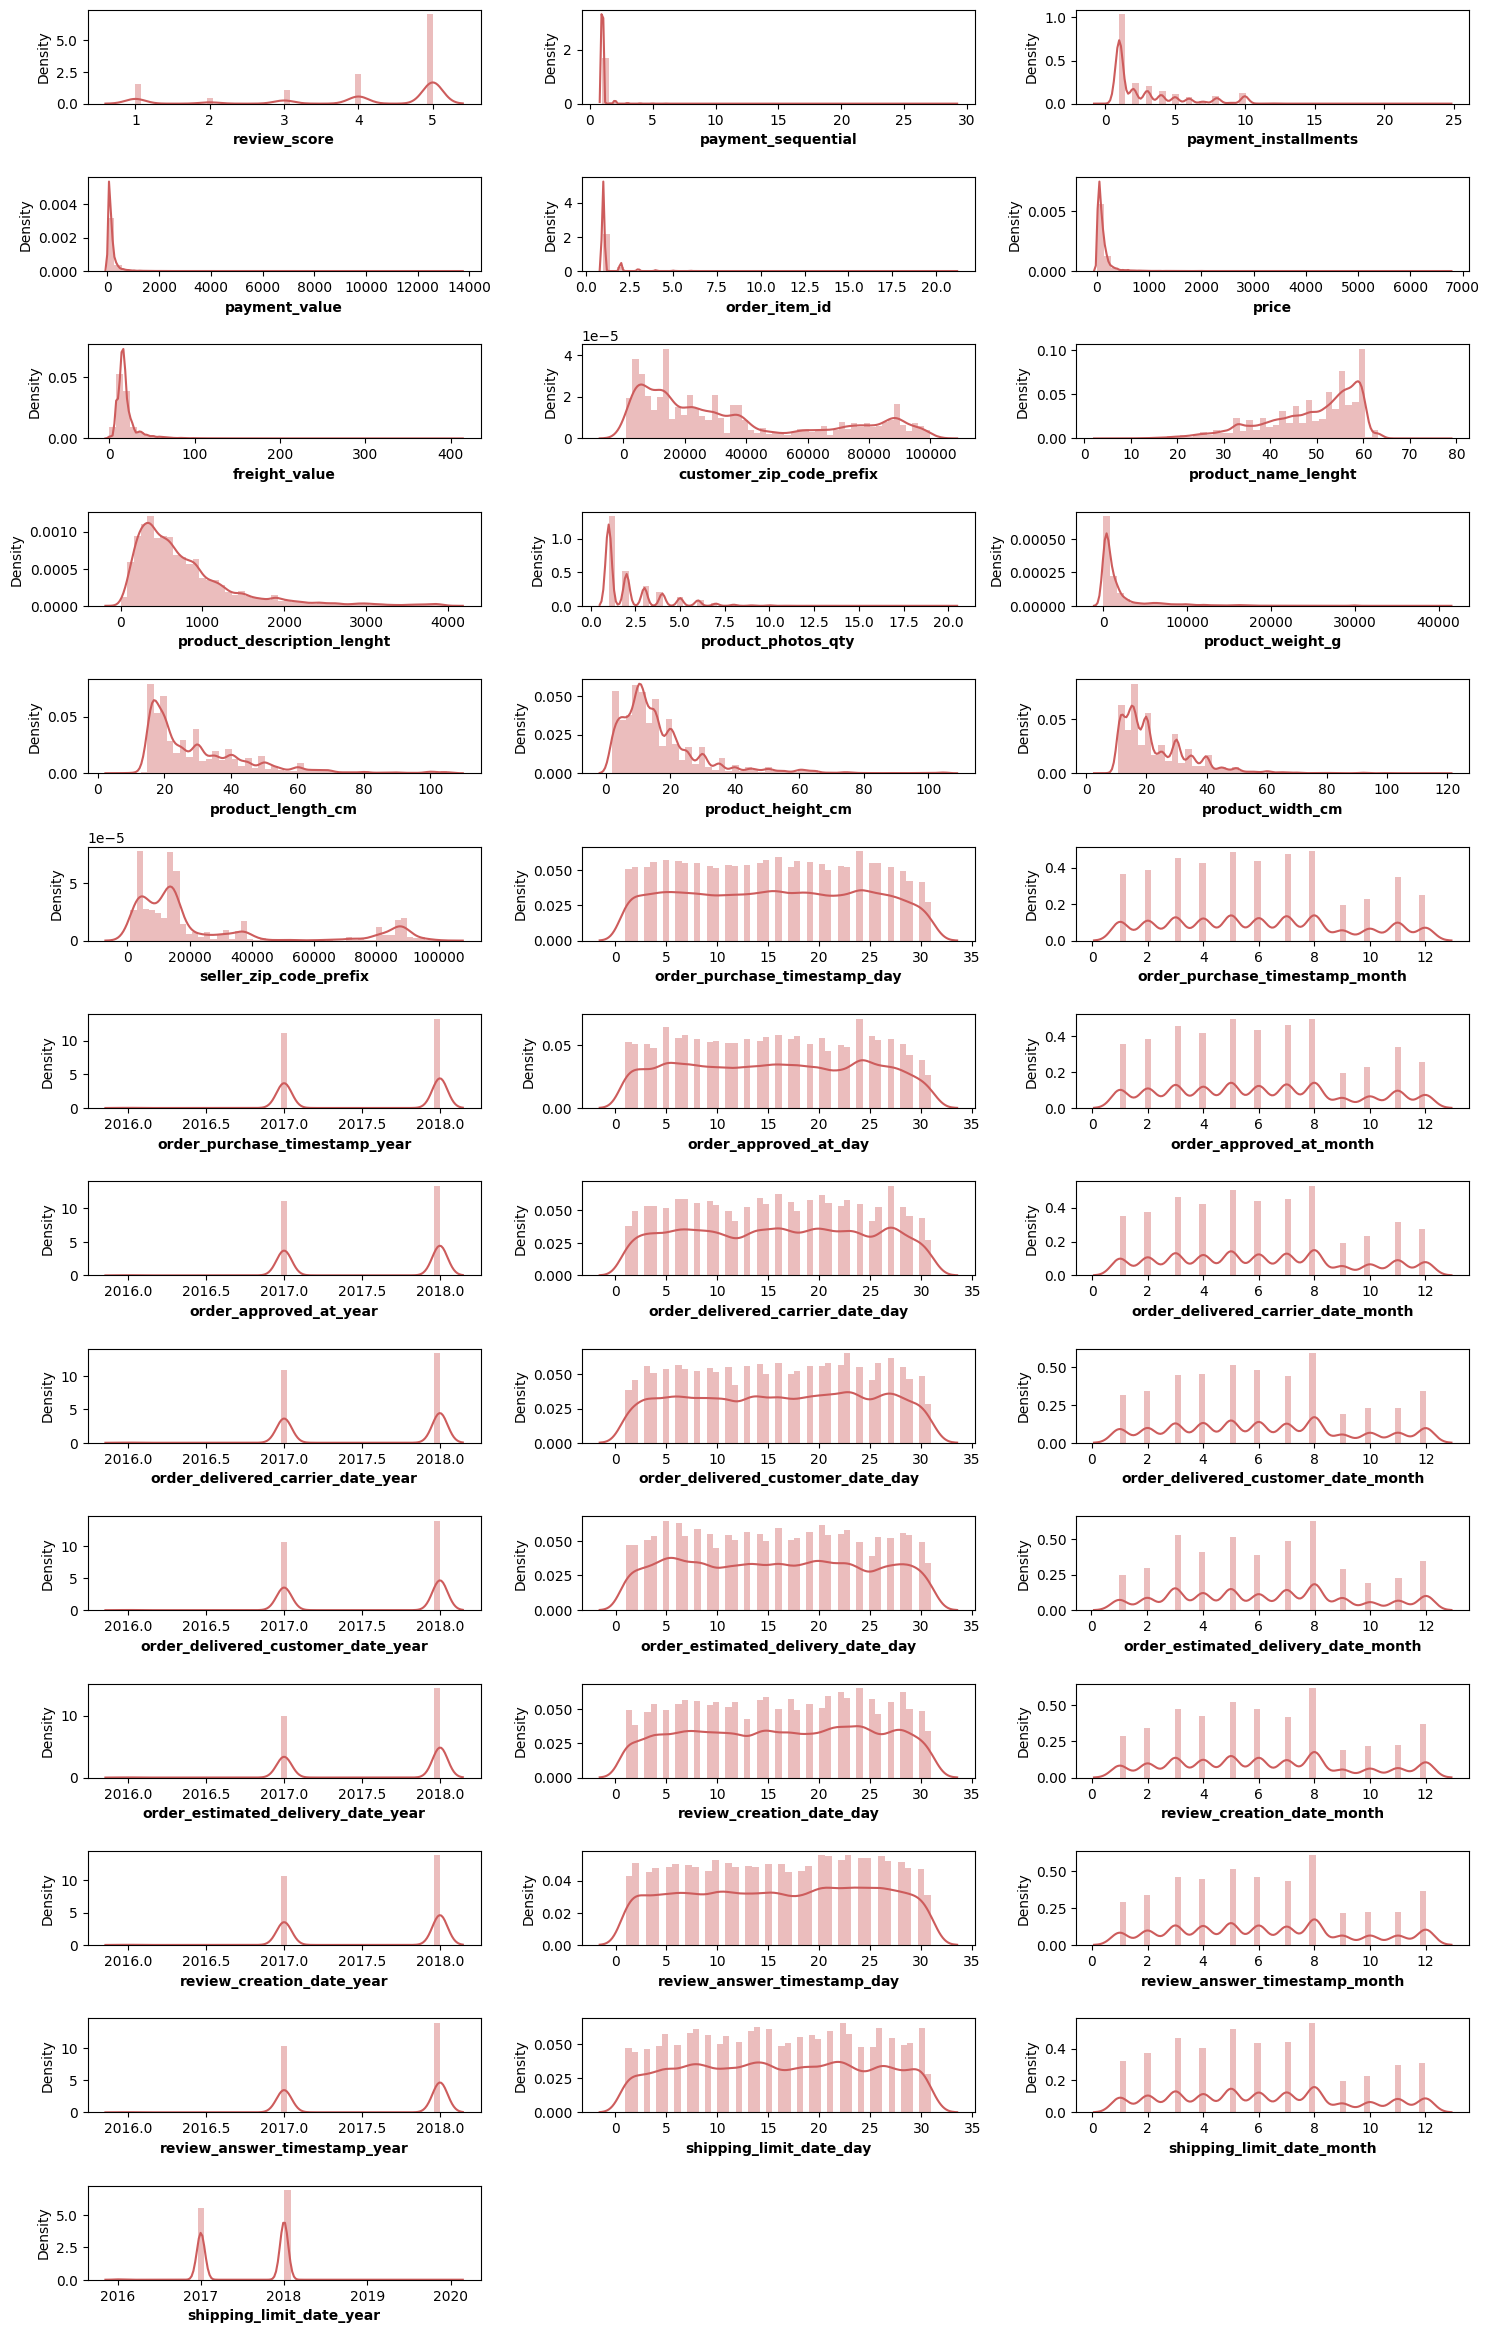

In [22]:
numeric_features = [feature for feature in final_df2.columns if final_df2[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=final_df2[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

Conclusions:

1. The columns of ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
        'geolocation_city', 'geolocation_state'] and ['product_category_name', 'product_category_name_english'] not considered
2. No duplicated values
3. Even after outer merge negligible NaN values review_comment_title=88%, review_comment_message=58%, order_delivered_customer_date=3%, order_delivered_carrier_date, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty= 2% and rest less than 1% 
4. Replaced NaN values in order date related items by replaceing with values in the same row. 
5. Possible to replace product_id related fields by checking with similar product _id and having values for size, height, etc. same for seller related columns
6. Since only 2% rows are having NaN values with product related fields we can remove the entire row or put '0' for product related data. Removed the whole rows where we have NaN values in product related fields. 
7. The final_df2['review_score'].value_counts() show imbalanced data hence use SMOTE method or hybrid under and over sampling
8. The number of orders peaks in August and then drops in September and gradually increases to next August. (from plots)
9. Most are continuous values only days, months year and order_status 7, review_score 5 and payment_type 4 need to be encoded


# FE

In [ ]:
# need to do label encoding
# one hot encoding for order_status, payment_type, 

# Model Training

In [29]:
from statistics import mean
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [23]:
# function to evaluate model on various parameters 
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [24]:
# Create cost of the model as per data description
# in this model we have not been given the cost for each type of classification
"""
def total_cost(y_true, y_pred):
    '''
    This function takes y_true, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost
"""

"\ndef total_cost(y_true, y_pred):\n    '''\n    This function takes y_true, y_predicted, and prints Total cost due to misclassification\n   \n    '''\n    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()\n    cost = 10*fp + 500*fn\n    return cost\n"

In [25]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [26]:
# Splitting X and y for all Experiments
X= final_df2.drop('review_score', axis=1)
y = final_df2['review_score']

In [32]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

NameError: name 'RobustScaler' is not defined